In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle

In [2]:
file = "../test_AnalyseGenie_stt.root"

In [3]:
file = upr.open(file)["myTree"]

In [4]:
df = file.arrays(['InteractionTarget',
                  'FinalHadronicSystemP4_TT',
                  'InitialNucleonMomentum',
                  'TransverseBoostingAngle',
                  'Asimmetry_RmH',
                  'EventType'],library='pd')

group_interaction_targets = lambda x : x if x == "proton" or x == 'C12' else "Heavy nucleus"
df["InteractionTarget_grouped"] = df["InteractionTarget"].apply(group_interaction_targets)
df["ScaleFactor"]=2.884724e-44

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'double-transverse momentum imbalance MC truth - Heavy nucleus')

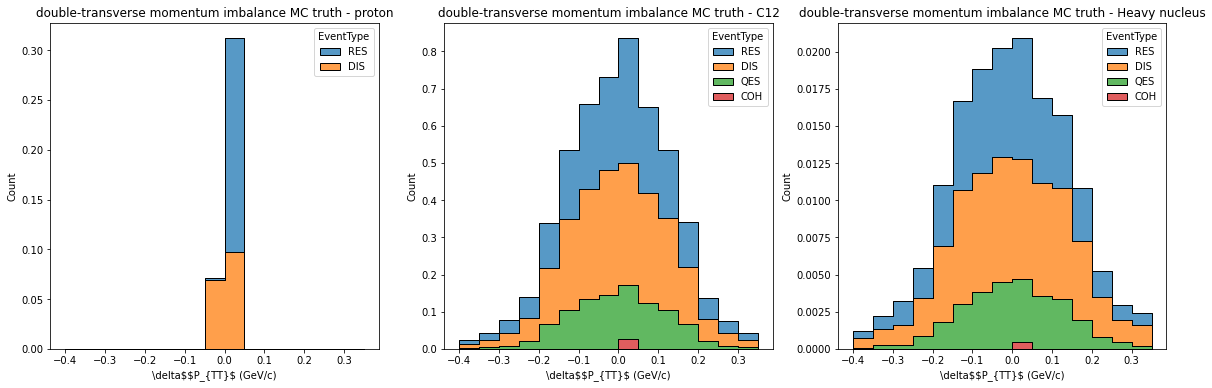

In [50]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.05), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.05), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.05), ax=ax[2])

ax[0].set_xlabel("\delta$$P_{TT}$ (GeV/c)")
ax[0].set_title("double-transverse momentum imbalance MC truth - proton")

ax[1].set_xlabel("\delta$$P_{TT}$ (GeV/c)")
ax[1].set_title("double-transverse momentum imbalance MC truth - C12")

ax[2].set_xlabel("\delta$$P_{TT}$ (GeV/c)")
ax[2].set_title("double-transverse momentum imbalance MC truth - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'Initital Nucleon momentum - Heavy nucleus')

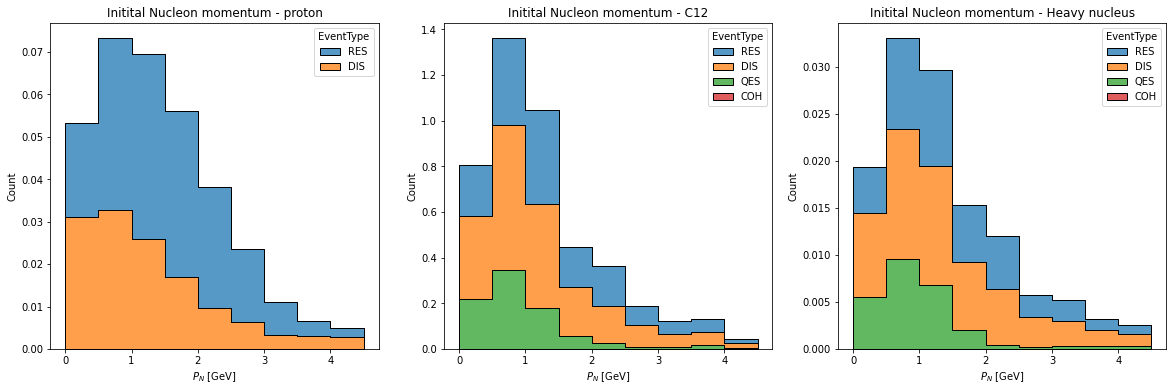

In [47]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.5), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.5), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.5), ax=ax[2])

ax[0].set_xlabel("$P_N$ [GeV]")
ax[0].set_title("Initital Nucleon momentum - proton")

ax[1].set_xlabel("$P_N$ [GeV]")
ax[1].set_title("Initital Nucleon momentum - C12")

ax[2].set_xlabel("$P_N$ [GeV]")
ax[2].set_title("Initital Nucleon momentum - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'Transverse Boosting Angle - Heavy nucleus')

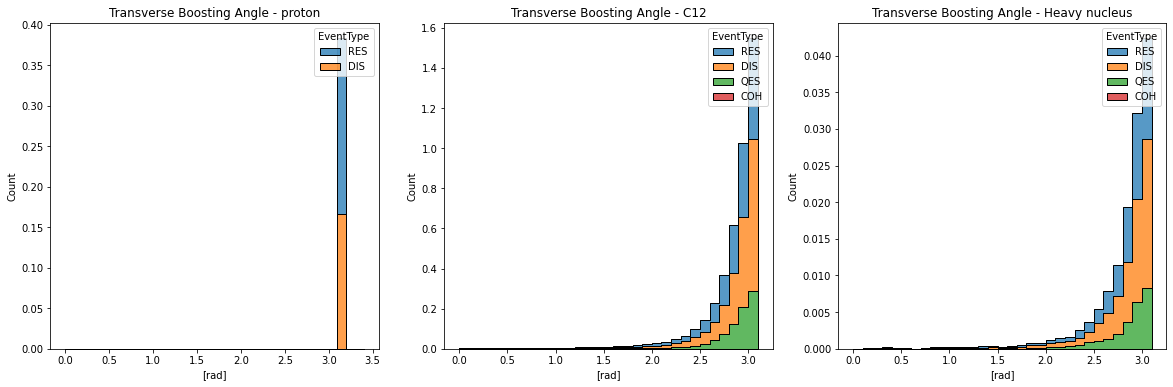

In [48]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi*1.1,0.1), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi,0.1), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi,0.1), ax=ax[2])

ax[0].set_xlabel("[rad]")
ax[0].set_title("Transverse Boosting Angle - proton")

ax[1].set_xlabel("[rad]")
ax[1].set_title("Transverse Boosting Angle - C12")

ax[2].set_xlabel("[rad]")
ax[2].set_title("Transverse Boosting Angle - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, '$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - Heavy nucleus')

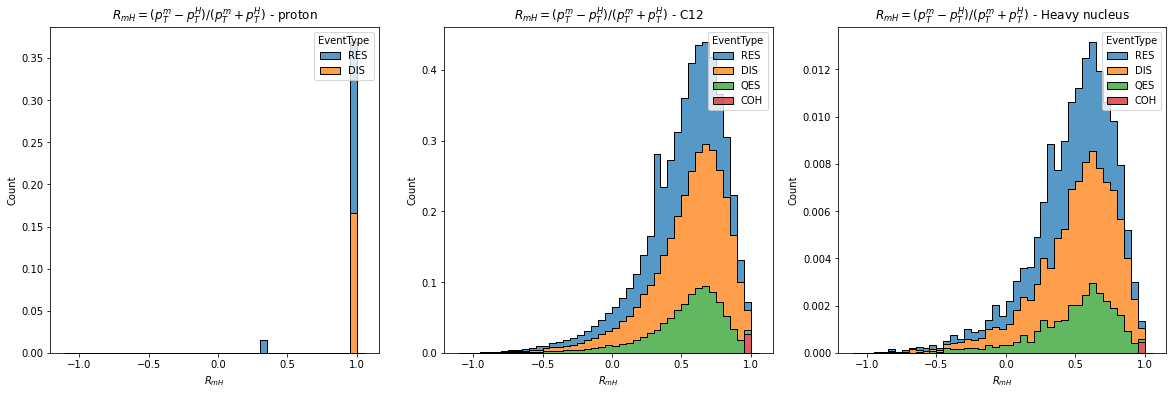

In [52]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.05), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.05), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.05), ax=ax[2])

ax[0].set_xlabel("$R_{mH}$")
ax[0].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - proton")

ax[1].set_xlabel("$R_{mH}$")
ax[1].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - C12")

ax[2].set_xlabel("$R_{mH}$")
ax[2].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - Heavy nucleus")

<AxesSubplot:xlabel='Asimmetry_RmH', ylabel='TransverseBoostingAngle'>

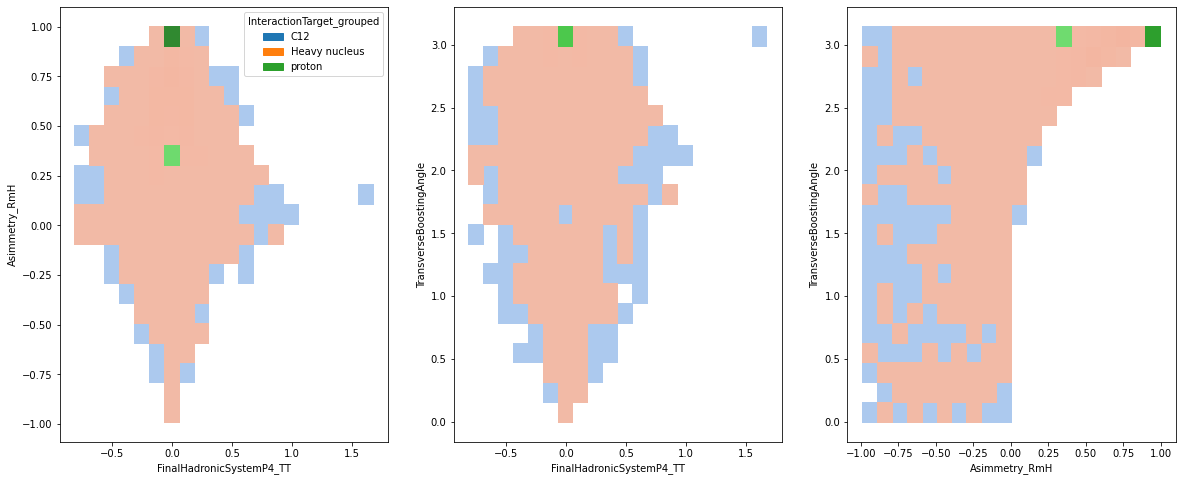

In [13]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=df,x="FinalHadronicSystemP4_TT",y="Asimmetry_RmH",hue="InteractionTarget_grouped",ax=ax[0],bins=20)
sns.histplot(data=df,x="FinalHadronicSystemP4_TT",y="TransverseBoostingAngle",hue="InteractionTarget_grouped",ax=ax[1],bins=20,legend=False)
sns.histplot(data=df,x="Asimmetry_RmH",y="TransverseBoostingAngle",hue="InteractionTarget_grouped",ax=ax[2],bins=20,legend=False)

In [4]:
file.keys()

['InteractionTarget',
 'InteractionTargetFromGEO',
 'EventType',
 'InitialStateNeutrinoP4',
 'InitialStateParticlesPDG',
 'InitialStateParticlesE',
 'InitialStateMomentum',
 'InitialStateEnergy',
 'StableFinalStateParticlesPDG',
 'StableFinalStateParticlesE',
 'StableFinalStateMomentum',
 'StableFinalStateEnergy',
 'FinalStateNuclearRemnantPDG',
 'FinalStateNuclearRemnantE',
 'FinalStateNuclearMomentum',
 'FinalStateNuclearEnergy',
 'FinalStateTopologyName',
 'FinalHadronicSystemP4_TT']

In [4]:
topology = file.arrays(['FinalStateTopology'],library='pd')

In [5]:
mu,pr,ne,pi,em,ex,nu = ([] for i in range(7))
for t in topology['FinalStateTopology']:
    t_split = t.split("_")
    for l,i in zip([mu,pr,ne,pi,em,ex,nu],t_split):
        l.append(int(i[:-2]))

In [8]:
topology=pd.DataFrame({'mu': mu,'pr': pr,'ne': ne,'pi': pi,'em': em,'ex': ex,'nu': nu})

In [11]:
topology['sum']=topology.mu+topology.pr+topology['ne'] +topology.pi+topology.em+topology.ex+topology.nu

In [13]:
topology

,mu,pr,ne,pi,em,ex,nu
sum,,,,,,,
1,12,12,12,12,12,12,12
2,106,106,106,106,106,106,106
3,257,257,257,257,257,257,257
4,184,184,184,184,184,184,184
5,135,135,135,135,135,135,135
6,92,92,92,92,92,92,92
7,75,75,75,75,75,75,75
8,39,39,39,39,39,39,39
9,33,33,33,33,33,33,33


In [55]:
FinalStateStablePDG = file.arrays(["StableFinalStateParticlesPDG"],library='pd')
print("genie stable final state particles")
[print(f"{i} -> {particle.Particle.from_pdgid(i).name}") for i in  np.unique(FinalStateStablePDG["StableFinalStateParticlesPDG"].values)]

genie stable final state particles
-3122 -> Lambda~
-2212 -> p~
-2112 -> n~
-321 -> K-
-311 -> K~0
-211 -> pi-
-13 -> mu+
-11 -> e+
11 -> e-
13 -> mu-
22 -> gamma
111 -> pi0
130 -> K(L)0
211 -> pi+
311 -> K0
321 -> K+
2112 -> n
2212 -> p
3122 -> Lambda
3212 -> Sigma0
3222 -> Sigma+
1000060120 -> C12
1000070140 -> N14
1000080160 -> O16
1000180400 -> Ar40


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [38]:
FinalStateNuclearRemnantPDG = file.arrays(["FinalStateNuclearRemnantPDG"],library='pd')
print("genie nuclear remnant")
[particle.Particle.from_pdgid(i).name if(i!=2000000002) else "unknown" for i in  np.unique(FinalStateNuclearRemnantPDG["FinalStateNuclearRemnantPDG"].values)]

genie nuclear remnant


['unknown']

In [41]:
InitialStateParticlesPDG = file.arrays(["InitialStateParticlesPDG"],library='pd')

In [54]:
FinalStateStablePDG.loc[4]

,StableFinalStateParticlesPDG
subentry,
0,13
1,2212
2,211
3,2212


In [4]:
file.keys()

['InteractionTarget',
 'InteractionTargetFromGEO',
 'EventType',
 'InitialStateParticlesPDG',
 'InitialStateParticlesE',
 'InitialStateMomentum',
 'InitialStateEnergy',
 'StableFinalStateParticlesPDG',
 'StableFinalStateParticlesE',
 'StableFinalStateMomentum',
 'StableFinalStateEnergy',
 'FinalStateNuclearRemnantPDG',
 'FinalStateNuclearRemnantE',
 'FinalStateNuclearMomentum',
 'FinalStateNuclearEnergy']

In [32]:
energy = file.arrays(['InitialStateEnergy','StableFinalStateEnergy','FinalStateNuclearEnergy'],library='pd')
momentum = file.arrays(['InitialStateMomentum','StableFinalStateMomentum','FinalStateNuclearMomentum'],library='pd')

In [33]:
energy['FinalStateEnergy'] = energy['StableFinalStateEnergy']+energy['FinalStateNuclearEnergy']
momentum['FinalStateMomentum'] = momentum['StableFinalStateMomentum']+momentum['FinalStateNuclearMomentum']

Text(0, 0.5, 'stable final state particles + nuclear remnant [GeV]')

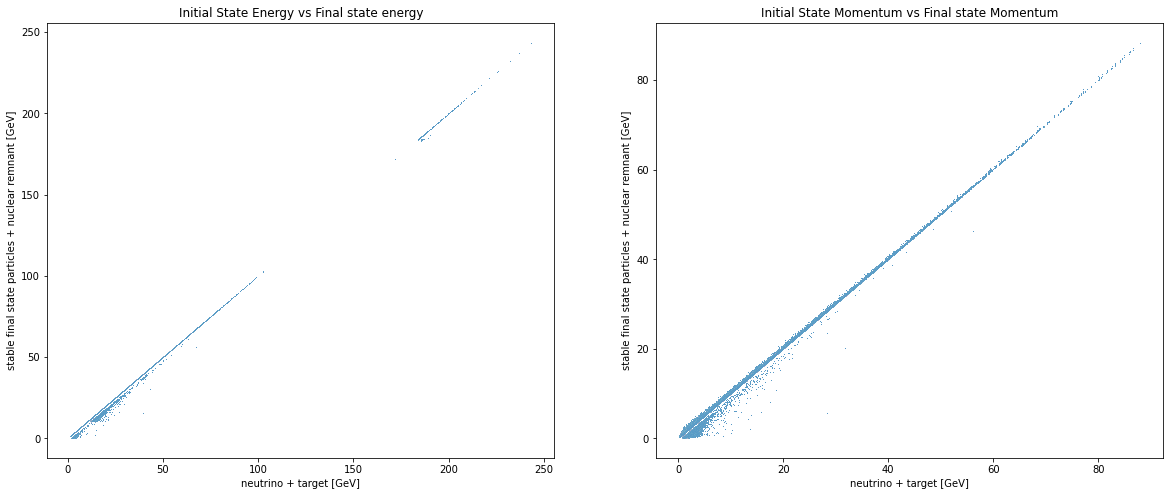

In [36]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.scatterplot(data=energy, x='InitialStateEnergy', y='FinalStateEnergy', s=1, ax=ax[0], x_bins=np.arange(0,20,0.1), y_bins=np.arange(0,20,0.1))
ax[0].set_title("Initial State Energy vs Final state energy")
ax[0].set_xlabel('neutrino + target [GeV]')
ax[0].set_ylabel('stable final state particles + nuclear remnant [GeV]')

sns.scatterplot(data=momentum, x='InitialStateMomentum', y='FinalStateMomentum', s=1, ax=ax[1])
ax[1].set_title("Initial State Momentum vs Final state Momentum")
ax[1].set_xlabel('neutrino + target [GeV]')
ax[1].set_ylabel('stable final state particles + nuclear remnant [GeV]')

<AxesSubplot:xlabel='MuonProtonKinImbalance', ylabel='Probability'>

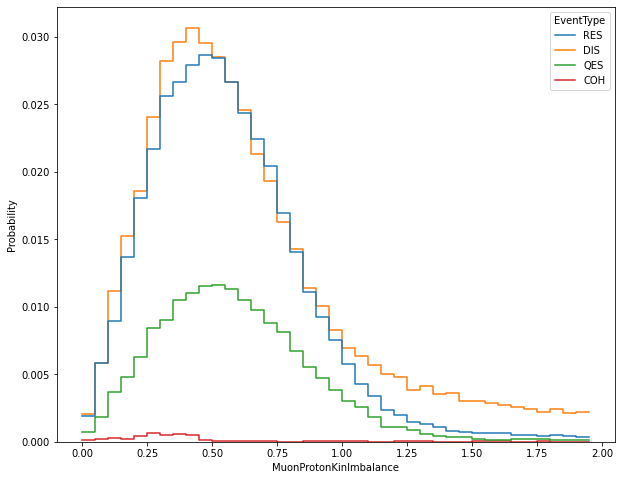

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(data=array, x="MuonHadronSystKinImbalance", hue="InteractionTarget",
             fill=False, element='step',stat='probability',
             bins=np.arange(0,2,0.05))